In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


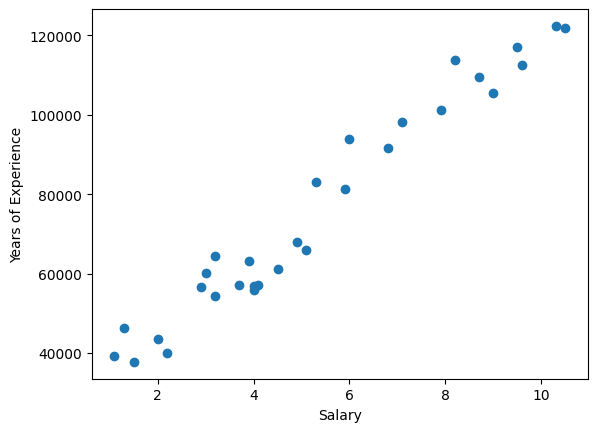

In [3]:
plt.scatter(data['YearsExperience'] , data['Salary'])
plt.xlabel('Salary')
plt.ylabel('Years of Experience')
plt.show()

In [4]:
X = data.iloc[:,0]
y = data.iloc[:,1]

In [5]:
X

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [6]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

In [8]:
X_train

23     8.2
6      3.0
3      2.0
20     6.8
5      2.9
27     9.6
12     4.0
4      2.2
10     3.9
16     5.1
28    10.3
25     9.0
17     5.3
2      1.5
7      3.2
26     9.5
24     8.7
18     5.9
11     4.0
22     7.9
29    10.5
13     4.1
15     4.9
8      3.2
Name: YearsExperience, dtype: float64

In [15]:
# Convert y_train to a NumPy array and then reshape it
y_train = np.array(y_train).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)


In [16]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [17]:
LR.fit(X_train , y_train)

LinearRegression()

In [19]:
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [21]:
X_test

array([[1.3],
       [1.1],
       [4.5],
       [3.7],
       [7.1],
       [6. ]])

In [22]:
y_test

array([[46205.],
       [39343.],
       [61111.],
       [57189.],
       [98273.],
       [93940.]])

In [20]:
LR.predict(X_test)

array([[36833.63210301],
       [34919.71472592],
       [67456.3101364 ],
       [59800.64062805],
       [92337.23603852],
       [81810.69046455]])

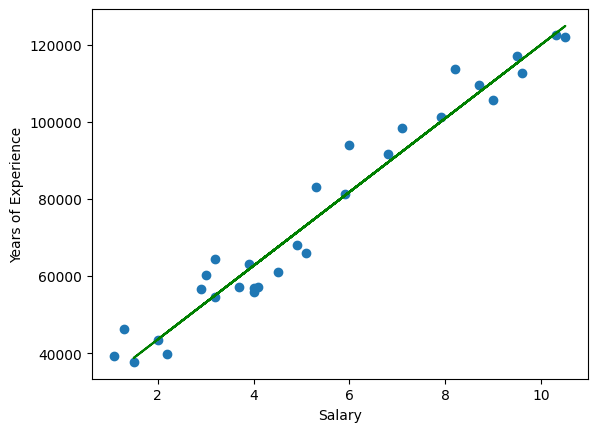

In [25]:
plt.scatter(data['YearsExperience'] , data['Salary'])
plt.xlabel('Salary')
plt.ylabel('Years of Experience')
plt.plot(X_train , LR.predict(X_train) , color='green')
plt.show()

In [26]:
#MAE , MSE , R2 score , Absolute R2 score
y_predict = LR.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [27]:
print('C is equal to ',LR.coef_)

C is equal to  [[9569.58688543]]


In [28]:
print('M is equal to ' ,LR.intercept_)

M is equal to  [24393.16915195]


In [34]:
X_test.shape

(6, 1)

In [36]:
print('MAE ->' , mean_absolute_error(y_test , y_predict))
print('MSE ->' , mean_squared_error(y_test , y_predict))
print('RMAE ->' , np.sqrt(mean_absolute_error(y_test , y_predict)))
print('R2 Score ->' , r2_score(y_test , y_predict))

#Absolute R2 score
r2 = r2_score(y_test , y_predict)
adj_r2 = 1 - (((1-r2)*(6-1)))/(6-1-1)
print("Adjusted R2 score ->",adj_r2)

MAE -> 6802.779572073898
MSE -> 56137509.9978255
RMAE -> 82.47896442168692
R2 Score -> 0.8886956733784565
Adjusted R2 score -> 0.8608695917230705
